In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url='https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-01.csv'
trips=pd.read_csv(url,index_col='lpep_pickup_datetime',parse_dates=True)
#trips.index = pd.to_datetime(trips.index, format='%Y-%d-%m %H:%M:%S')

In [2]:
first_ten=trips.head(10)
first_ten

,VendorID,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:29:24,2,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
2016-01-01 00:19:39,2,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0
2016-01-01 00:19:33,2,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0
2016-01-01 00:22:12,2,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0
2016-01-01 00:24:01,2,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0
2016-01-01 00:32:59,2,2016-01-01 00:39:35,N,1,-73.891144,40.746456,-73.867744,40.742111,1,1.37,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
2016-01-01 00:34:42,2,2016-01-01 00:39:21,N,1,-73.896675,40.746197,-73.886192,40.745689,1,0.57,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
2016-01-01 00:31:23,2,2016-01-01 00:39:36,N,1,-73.953354,40.803558,-73.949150,40.794121,1,1.01,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
2016-01-01 00:24:40,2,2016-01-01 00:39:52,N,1,-73.994064,40.702816,-73.971573,40.679726,1,2.46,12.0,0.5,0.5,2.00,0.0,NaN,0.3,15.30,1,1.0


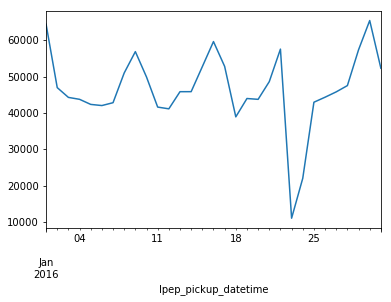

In [3]:
trips.Total_amount.resample('D').count().plot()
## Was thete cab driver's strike on Jan 23?'''
## Google search revealed there was a big snow strom Jan 23 & 24, 2016

'People use taxi more on Fridays'

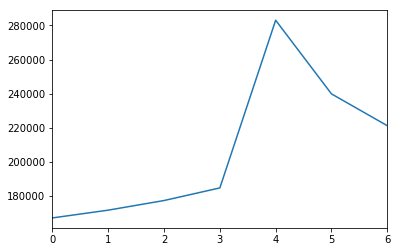

In [4]:
trips.groupby(trips.index.dayofweek)['Total_amount'].count().plot()## number of trips each weekday
'''People use taxi more on Fridays'''

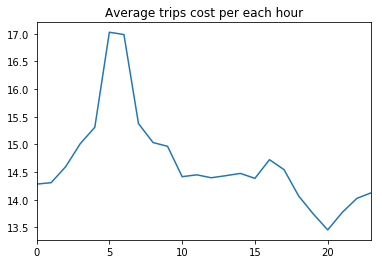

In [5]:
ax=trips.groupby(trips.index.hour)['Total_amount'].mean().plot()
ax.set_title('Average trips cost per each hour')

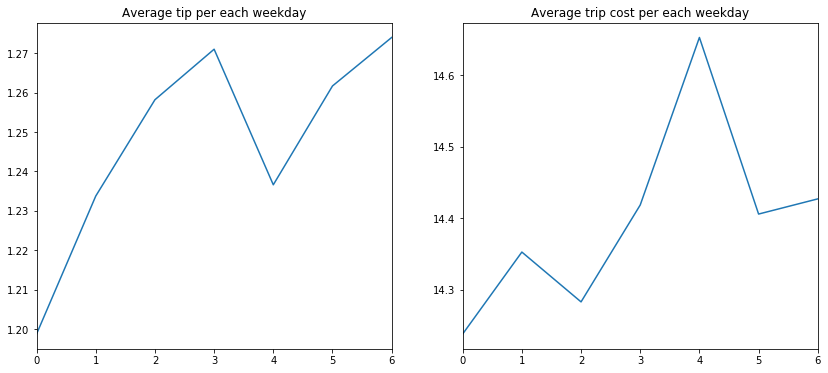

In [6]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
trips.groupby(trips.index.dayofweek)['Tip_amount'].mean().plot(ax=ax[0])
trips.groupby(trips.index.dayofweek)['Total_amount'].mean().plot(ax=ax[1])
ax[0].set_title('Average tip per each weekday')
ax[1].set_title('Average trip cost per each weekday')
##Thursday and Sunay bring the most tips

' 1= Credit card\n    2= Cash\n    3= No charge\n    4= Dispute\n    5= Unknown\n    6= Voided trip'

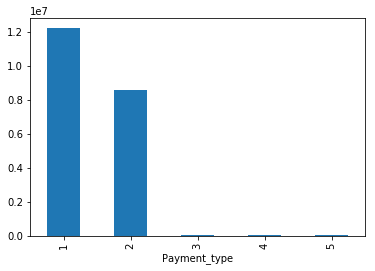

In [7]:
trips.groupby('Payment_type')['Total_amount'].sum().T.plot('bar')
''' 1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip'''

In [8]:
trips.Trip_distance.describe()

count    1.445285e+06
mean     2.757192e+00
std      2.953487e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.800000e+00
75%      3.450000e+00
max      3.605000e+02
Name: Trip_distance, dtype: float64

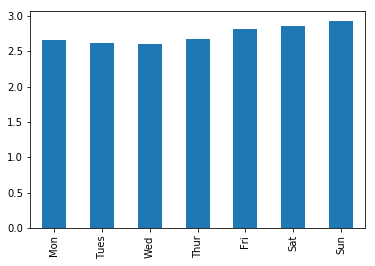

In [9]:
distance_by_weekday=trips.groupby(trips.index.dayofweek)['Trip_distance'].mean()
distance_by_weekday.index=['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
distance_by_weekday.plot(kind='bar')

In [40]:
import mplleaflet
def plot_path(coords):
    x_coords = [coord[1] for coord in coords] 
    y_coords = [coord[0] for coord in coords]
    plt.plot(x_coords, y_coords, 'r',linewidth=4.0)
    mplleaflet.show()

In [11]:
import googlemaps
import os
import json
from polyline.codec import PolylineCodec

path = '/Users/anastasiaclark/Desktop/MyStaff/credentials/google_maps_api_key.json'
my_key = json.load(open(path))['key']
gmaps = googlemaps.Client(key=my_key)

In [12]:
def get_trip_path(start, end, client):
    req = client.directions(start, end, mode='driving')
    polylines = [step['polyline']['points'] for step in [leg['steps'] for leg in req[0]['legs']][0]]
    coords = []
    for polyline in polylines:
        coords += PolylineCodec().decode(polyline)
    return coords

In [41]:
ten_paths=[]
for row in first_ten.itertuples():
    one_path = get_trip_path([row.Pickup_latitude,row.Pickup_longitude], [row.Dropoff_latitude,row.Dropoff_longitude], gmaps) # actual path from the data
    ten_paths.append(one_path)
plot_path(ten_paths[1])